In [47]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, accuracy_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
train_data = pd.read_csv('../Training Data.csv', low_memory = False)
val_data = pd.read_csv('../Validation Data.csv', low_memory = False)
print(train_data.shape)
print(val_data.shape)

(6996, 1071)
(779, 1071)


In [8]:
# X = np.array(data_full.drop(labels = 'y', axis = 1))
X_train = np.array(train_data.drop(labels = 'y', axis = 1))
X_test = np.array(val_data.drop(labels = 'y', axis = 1))
y_train = train_data['y']
y_test = val_data['y']
y_train_binary = np.zeros(len(y_train))
y_train_binary[y_train == 'BBB+'] = 1
y_test_binary = np.zeros(len(y_test))
y_test_binary[y_test == 'BBB+'] = 1

print(X_train.shape)
print(y_train_binary.shape)
print(X_test.shape)
print(y_test_binary.shape)

(6996, 1070)
(6996,)
(779, 1070)
(779,)


In [9]:
rs = 42
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=rs)

In [10]:
nn_model = Sequential()
nn_model.add(Dense(128, activation = 'tanh'))
nn_model.add(Dense(32, activation = 'tanh'))
nn_model.add(Dense(1, activation = 'sigmoid'))

nn_model.compile(
    optimizer = 'Adam',
    loss =  BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [11]:
def kcv_metric(thresh):
    rs = 42
    f_vec = []
    tpr_vec = []
    fpr_vec = []
    print('computing with threshold:{}'.format(thresh))
    skf = StratifiedKFold(n_splits = 5, shuffle = True,random_state = rs)
    for train_id, test_id in tqdm(skf.split(X_train, y_train)):
        X_train_k, X_test_k = X_train[train_id], X_train[test_id]
        y_train_k, y_test_k = y_train_binary[train_id], y_train_binary[test_id]

        nn_model.fit(X_train_k, y_train_k, epochs = 20, verbose = 0)
        probs = nn_model.predict(X_test_k)
        preds = np.where(probs>thresh, 1, 0)
        f_vec.append(f1_score(y_test_k, preds))
        tn,fp,fn,tp = confusion_matrix(y_test_k, preds).ravel()
        tpr_vec.append(tp/(tp+fn))
        fpr_vec.append(fp/(fp+tn))

    f_vec=np.array(f_vec)
    return np.array([f_vec.mean()] + tpr_vec + fpr_vec)

In [13]:
thresh_vals = np.arange(0,1,0.01)
res_tanh = [kcv_metric(t) for t in thresh_vals]
print(res_tanh)

computing with threshold:0.0


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.78s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  8.44s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:25,  8.61s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:34,  8.70s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:43,  8.62s/it]


computing with threshold:0.01


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.65s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  8.41s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:25,  8.57s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:33,  8.38s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:42,  8.51s/it]


computing with threshold:0.02


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.39s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:17,  8.76s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:25,  8.45s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:34,  8.66s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:42,  8.54s/it]


computing with threshold:0.03


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:09,  9.35s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:19,  9.56s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:28,  9.31s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:37,  9.31s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:46,  9.31s/it]


computing with threshold:0.04


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:09,  9.51s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:18,  9.43s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:27,  9.18s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:36,  8.86s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:43,  8.67s/it]


computing with threshold:0.05


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.04s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:15,  7.69s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:25,  8.61s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:32,  7.98s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:39,  7.99s/it]


computing with threshold:0.06


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.25s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:15,  7.86s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.51s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:29,  7.29s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.48s/it]


computing with threshold:0.07


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.21s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:14,  7.46s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.34s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:29,  7.43s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:36,  7.36s/it]


computing with threshold:0.08


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.34s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.00s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:21,  7.37s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:30,  7.67s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:38,  7.66s/it]


computing with threshold:0.09


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:09,  9.89s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:19,  9.48s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:27,  9.18s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:35,  8.56s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:42,  8.50s/it]


computing with threshold:0.1


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.54s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.28s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.59s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.53s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:38,  7.60s/it]


computing with threshold:0.11


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.34s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:15,  7.64s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.63s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:30,  7.70s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:38,  7.63s/it]


computing with threshold:0.12


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.43s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.40s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.37s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.61s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:37,  7.45s/it]


computing with threshold:0.13


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.83s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:14,  7.42s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.66s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.61s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:38,  7.77s/it]


computing with threshold:0.14


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.92s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:16,  8.11s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.80s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:31,  7.91s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:39,  7.84s/it]


computing with threshold:0.15


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:08,  8.09s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.70s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:23,  7.92s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:31,  7.76s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:39,  7.87s/it]


computing with threshold:0.16


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.53s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:15,  7.84s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.67s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:31,  7.83s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:38,  7.72s/it]


computing with threshold:0.17


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.98s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.64s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:23,  7.74s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.69s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:38,  7.71s/it]


computing with threshold:0.18


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.82s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.47s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.62s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:31,  8.10s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:39,  7.93s/it]


computing with threshold:0.19


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.02s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.80s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.49s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:31,  7.83s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:38,  7.74s/it]


computing with threshold:0.2


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:08,  8.22s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  7.96s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:24,  8.14s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:32,  8.02s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:40,  8.11s/it]


computing with threshold:0.21


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.44s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:15,  7.94s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:23,  7.98s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:32,  8.26s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:40,  8.10s/it]


computing with threshold:0.22


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:08,  8.25s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  7.98s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.77s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:31,  7.75s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:39,  7.95s/it]


computing with threshold:0.23


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.73s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  8.02s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.82s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:31,  7.91s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:39,  7.87s/it]


computing with threshold:0.24


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:08,  8.19s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.83s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:24,  8.14s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:31,  7.92s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:39,  7.96s/it]


computing with threshold:0.25


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.62s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:15,  8.03s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.73s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:31,  7.85s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:38,  7.70s/it]


computing with threshold:0.26


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.78s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.46s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:22,  7.59s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.54s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.59s/it]


computing with threshold:0.27


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.24s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:14,  7.47s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.29s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:29,  7.47s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.56s/it]


computing with threshold:0.28


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.52s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:16,  8.33s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:24,  8.27s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:32,  8.18s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:41,  8.27s/it]


computing with threshold:0.29


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.27s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  8.39s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:24,  8.20s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:33,  8.32s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:40,  8.14s/it]


computing with threshold:0.3


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.06s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  8.09s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:25,  8.53s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:33,  8.36s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:41,  8.34s/it]


computing with threshold:0.31


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.00s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.91s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.78s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:32,  8.35s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:40,  8.08s/it]


computing with threshold:0.32


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:08,  8.78s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:16,  8.09s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:24,  8.12s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:32,  7.87s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:40,  8.03s/it]


computing with threshold:0.33


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.74s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.97s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.72s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:31,  7.82s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:38,  7.76s/it]


computing with threshold:0.34


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:08,  8.08s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.74s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.88s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:31,  7.76s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:39,  7.84s/it]


computing with threshold:0.35000000000000003


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.53s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  8.07s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.82s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:31,  7.92s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:39,  7.81s/it]


computing with threshold:0.36


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:08,  8.35s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  8.14s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:24,  8.26s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:32,  8.23s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:42,  8.45s/it]


computing with threshold:0.37


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.09s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  8.45s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:24,  8.29s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:35,  9.29s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:45,  9.04s/it]


computing with threshold:0.38


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.16s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:16,  8.21s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:24,  7.95s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:31,  7.86s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:39,  7.84s/it]


computing with threshold:0.39


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.99s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:15,  7.82s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:24,  8.19s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:32,  8.02s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:40,  8.01s/it]


computing with threshold:0.4


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.42s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:14,  7.27s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:22,  7.43s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.69s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.58s/it]


computing with threshold:0.41000000000000003


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:06,  6.52s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:14,  7.15s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:21,  7.09s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:28,  7.21s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:36,  7.21s/it]


computing with threshold:0.42


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.33s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.27s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:22,  7.38s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.40s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:36,  7.29s/it]


computing with threshold:0.43


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.74s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.58s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:23,  8.01s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.71s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:38,  7.79s/it]


computing with threshold:0.44


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.16s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.37s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.29s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:28,  7.21s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:35,  7.19s/it]


computing with threshold:0.45


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:06,  6.98s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.30s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.21s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.41s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:36,  7.30s/it]


computing with threshold:0.46


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.66s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.60s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:22,  7.55s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.64s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:38,  7.71s/it]


computing with threshold:0.47000000000000003


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.51s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.65s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.62s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.42s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:37,  7.50s/it]


computing with threshold:0.48


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.52s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.48s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.75s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.77s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.57s/it]


computing with threshold:0.49


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.25s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.34s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.50s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:29,  7.43s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.41s/it]


computing with threshold:0.5


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.12s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:13,  6.81s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:20,  6.82s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:27,  6.74s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:34,  6.87s/it]


computing with threshold:0.51


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:06,  6.94s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:13,  6.87s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:20,  6.89s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:28,  7.17s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:35,  7.06s/it]


computing with threshold:0.52


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.04s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.03s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:21,  7.07s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.43s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:36,  7.21s/it]


computing with threshold:0.53


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.53s/it]

44/44 [==============================] - 0s 868us/step


2it [00:14,  6.93s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  6.98s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:28,  7.01s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:34,  6.97s/it]


computing with threshold:0.54


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:06,  6.97s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:13,  6.90s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.28s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:28,  7.30s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:35,  7.17s/it]


computing with threshold:0.55


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:06,  6.97s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.36s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.13s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:28,  7.25s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:36,  7.25s/it]


computing with threshold:0.56


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.59s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.25s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.04s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:28,  7.14s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:35,  7.15s/it]


computing with threshold:0.5700000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.88s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:14,  7.36s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.57s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.33s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.42s/it]


computing with threshold:0.58


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.79s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.87s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.51s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.51s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.46s/it]


computing with threshold:0.59


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:06,  6.87s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.26s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.07s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:28,  7.23s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:35,  7.09s/it]


computing with threshold:0.6


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:06,  6.77s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:14,  7.31s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.75s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:33,  8.85s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:43,  8.77s/it]


computing with threshold:0.61


0it [00:00, ?it/s]

44/44 [==============================] - 0s 3ms/step


1it [00:09,  9.58s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:19,  9.89s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:29,  9.89s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:40, 10.18s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:49,  9.91s/it]


computing with threshold:0.62


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:09,  9.05s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:17,  8.90s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:27,  9.02s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:36,  9.14s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:45,  9.11s/it]


computing with threshold:0.63


0it [00:00, ?it/s]

44/44 [==============================] - 0s 3ms/step


1it [00:10, 10.67s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:20, 10.20s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:30, 10.23s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:40,  9.96s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:50, 10.11s/it]


computing with threshold:0.64


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:09,  9.82s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:18,  9.32s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:28,  9.59s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:38,  9.55s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:48,  9.66s/it]


computing with threshold:0.65


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:09,  9.37s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:18,  9.00s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:28,  9.43s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:36,  9.17s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:46,  9.22s/it]


computing with threshold:0.66


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.84s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:17,  8.82s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:26,  8.86s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:35,  8.80s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:44,  9.00s/it]


computing with threshold:0.67


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.99s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:18,  9.18s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:26,  8.89s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:35,  8.93s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:45,  9.19s/it]


computing with threshold:0.68


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.27s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:16,  8.53s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:25,  8.46s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:33,  8.51s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:42,  8.42s/it]


computing with threshold:0.6900000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.67s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:16,  8.26s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:25,  8.54s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:34,  8.76s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:43,  8.74s/it]


computing with threshold:0.7000000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:09,  9.18s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:17,  8.88s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:26,  8.95s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:35,  8.91s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:45,  9.01s/it]


computing with threshold:0.71


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.71s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:17,  9.00s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:26,  8.78s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:35,  8.83s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:44,  8.92s/it]


computing with threshold:0.72


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:08,  8.87s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:17,  8.67s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:26,  8.65s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:35,  8.83s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:43,  8.68s/it]


computing with threshold:0.73


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:08,  8.41s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:16,  8.03s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:24,  8.31s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:32,  8.03s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:40,  8.07s/it]


computing with threshold:0.74


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.49s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.56s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.49s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.59s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.55s/it]


computing with threshold:0.75


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.46s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.59s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.90s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.74s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.57s/it]


computing with threshold:0.76


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.65s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.41s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:22,  7.45s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.45s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.48s/it]


computing with threshold:0.77


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.69s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.53s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.46s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.41s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.46s/it]


computing with threshold:0.78


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.33s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.57s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.86s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.59s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:38,  7.72s/it]


computing with threshold:0.79


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.67s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  8.12s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:24,  8.14s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:32,  8.22s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:40,  8.12s/it]


computing with threshold:0.8


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:08,  8.41s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.75s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.81s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:31,  7.83s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:39,  7.88s/it]


computing with threshold:0.81


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.53s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:15,  7.76s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.68s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:30,  7.58s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:38,  7.78s/it]


computing with threshold:0.8200000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.61s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.54s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:22,  7.32s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.42s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:36,  7.39s/it]


computing with threshold:0.8300000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.20s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.00s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.27s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:28,  7.16s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:35,  7.18s/it]


computing with threshold:0.84


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.20s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:13,  6.89s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.01s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:27,  6.96s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:35,  7.12s/it]


computing with threshold:0.85


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:06,  6.98s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.19s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.13s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:28,  7.19s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:35,  7.10s/it]


computing with threshold:0.86


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.12s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:16,  8.10s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.49s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.20s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:37,  7.41s/it]


computing with threshold:0.87


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.98s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.33s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.61s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.61s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:38,  7.70s/it]


computing with threshold:0.88


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.84s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  8.52s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:26,  9.02s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:34,  8.75s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:42,  8.44s/it]


computing with threshold:0.89


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.09s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:20, 10.43s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:29,  9.83s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:38,  9.71s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:48,  9.72s/it]


computing with threshold:0.9


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:09,  9.01s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.75s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.82s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:31,  7.71s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:39,  7.93s/it]


computing with threshold:0.91


0it [00:00, ?it/s]

44/44 [==============================] - 0s 992us/step


1it [00:07,  7.41s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.18s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.07s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.57s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:36,  7.33s/it]


computing with threshold:0.92


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.44s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.20s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.52s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.34s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:36,  7.29s/it]


computing with threshold:0.93


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.18s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.10s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:21,  7.31s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:28,  7.16s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:36,  7.31s/it]


computing with threshold:0.9400000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.25s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:14,  7.27s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:21,  7.33s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:30,  7.66s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:37,  7.54s/it]


computing with threshold:0.9500000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.90s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:15,  7.80s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:23,  7.80s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:31,  7.92s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:39,  7.97s/it]


computing with threshold:0.96


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.61s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:15,  8.04s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:23,  7.95s/it]

44/44 [==============================] - 0s 2ms/step


4it [00:32,  8.12s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:39,  8.00s/it]


computing with threshold:0.97


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:08,  8.43s/it]

44/44 [==============================] - 0s 1ms/step


2it [00:16,  8.05s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:25,  8.58s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:32,  8.12s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:41,  8.24s/it]


computing with threshold:0.98


0it [00:00, ?it/s]

44/44 [==============================] - 0s 2ms/step


1it [00:07,  7.98s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:16,  8.24s/it]

44/44 [==============================] - 0s 2ms/step


3it [00:24,  8.10s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:32,  8.04s/it]

44/44 [==============================] - 0s 1ms/step


5it [00:39,  7.94s/it]


computing with threshold:0.99


0it [00:00, ?it/s]

44/44 [==============================] - 0s 1ms/step


1it [00:07,  7.58s/it]

44/44 [==============================] - 0s 2ms/step


2it [00:14,  7.37s/it]

44/44 [==============================] - 0s 1ms/step


3it [00:22,  7.58s/it]

44/44 [==============================] - 0s 1ms/step


4it [00:29,  7.45s/it]

44/44 [==============================] - 0s 2ms/step


5it [00:37,  7.45s/it]

[array([0.77638826, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ]), array([0.78507295, 1.        , 1.        , 0.99887387, 1.        ,
       1.        , 0.9609375 , 0.95890411, 0.93933464, 0.94716243,
       0.94335938]), array([0.7888227 , 1.        , 1.        , 0.99887387, 1.        ,
       0.9988726 , 0.94726562, 0.95303327, 0.93933464, 0.91193738,
       0.890625  ]), array([0.79077819, 1.        , 1.        , 0.99887387, 1.        ,
       0.9988726 , 0.92578125, 0.92172211, 0.93737769, 0.91193738,
       0.890625  ]), array([0.79190356, 1.        , 1.        , 0.99887387, 1.        ,
       0.9988726 , 0.91601562, 0.90998043, 0.9295499 , 0.90998043,
       0.890625  ]), array([0.79228927, 1.        , 1.        , 0.99774775, 1.        ,
       0.9988726 , 0.9140625 , 0.90998043, 0.92367906, 0.90410959,
       0.890625  ]), array([0.79239985, 1.        , 1.        , 0.99887387, 1.        ,
  

In [32]:
res_tanh = np.array(res_tanh)

In [33]:
max_ind = np.argmax(res_tanh[:,0])
thresh_vals[max_ind]

0.3

In [34]:
np.max(res_tanh[:,0])

0.7965211507435435

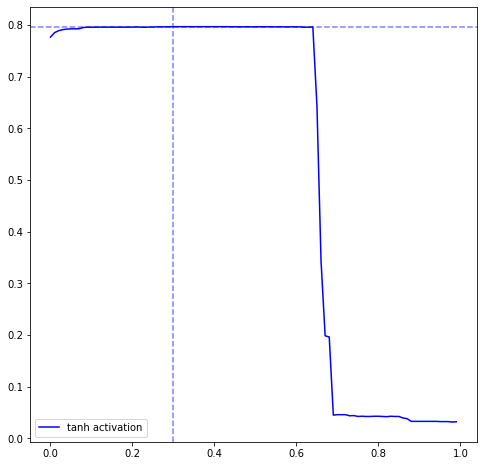

In [35]:
fig_f, axs_f = plt.subplots(1,1,figsize = (8,8))
axs_f.plot(thresh_vals, res_tanh[:,0], color = 'b', label = 'tanh activation')
axs_f.axvline(thresh_vals[max_ind], linestyle = '--', color = 'blue', alpha = 0.5)
axs_f.axhline(res_tanh[max_ind,0], linestyle = '--', color = 'blue', alpha = 0.5)
axs_f.legend()

In [36]:
avg_tpr = res_tanh[:,1:6].mean(axis = 1)
avg_fpr = res_tanh[:,6:12].mean(axis = 1)
print(avg_tpr.shape)
print(avg_fpr.shape)

(100,)
(100,)


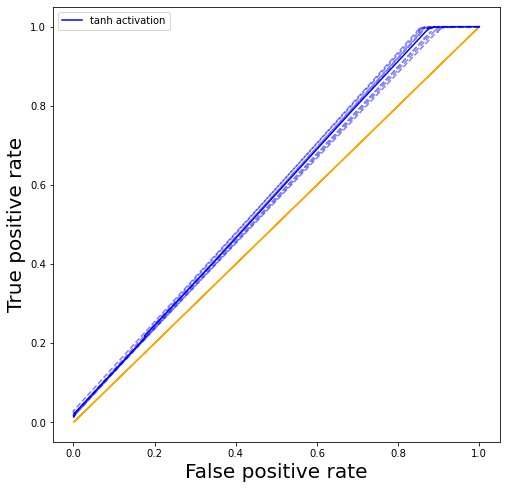

In [44]:
fig_roc, axs_roc = plt.subplots(1,1,figsize = (8,8))
axs_roc.plot(np.append(avg_fpr,1), np.append(avg_fpr,1), color = 'orange')
for i in np.arange(5):
    axs_roc.plot(res_tanh[:,i+6], res_tanh[:,i+1], color = 'blue', linestyle = '--', alpha = 0.5)
axs_roc.plot(avg_fpr, avg_tpr, color = 'blue', label = 'tanh activation')
axs_roc.set_xlabel('False positive rate', fontsize = 20)
axs_roc.set_ylabel('True positive rate', fontsize = 20)
axs_roc.legend()

In [30]:
nn_model = Sequential()
nn_model.add(Dense(128, activation = 'relu'))
nn_model.add(Dense(32, activation = 'relu'))
nn_model.add(Dense(1, activation = 'sigmoid'))
nn_model.compile(
    optimizer = 'Adam',
    loss =  BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [31]:
res_relu = [kcv_metric(t) for t in thresh_vals]

computing with threshold:0.0


0it [00:00, ?it/s]

44/44 [==============================] - 3s 1ms/step


1it [00:17, 17.72s/it]

44/44 [==============================] - 3s 1ms/step


2it [00:30, 14.80s/it]

44/44 [==============================] - 5s 2ms/step


3it [00:50, 17.11s/it]

44/44 [==============================] - 4s 1ms/step


4it [01:08, 17.35s/it]

44/44 [==============================] - 3s 1ms/step


5it [01:24, 16.87s/it]


computing with threshold:0.01


0it [00:00, ?it/s]

44/44 [==============================] - 3s 1ms/step


1it [00:13, 13.70s/it]

44/44 [==============================] - 2s 1ms/step


2it [00:27, 13.94s/it]

44/44 [==============================] - 3s 1ms/step


3it [00:40, 13.54s/it]

44/44 [==============================] - 3s 1ms/step


4it [00:52, 12.87s/it]

44/44 [==============================] - 2s 1ms/step


5it [01:03, 12.79s/it]


computing with threshold:0.02


0it [00:00, ?it/s]

44/44 [==============================] - 2s 1ms/step


1it [00:11, 11.93s/it]

44/44 [==============================] - 2s 992us/step


2it [00:26, 13.32s/it]

44/44 [==============================] - 3s 1ms/step


3it [00:38, 12.73s/it]

44/44 [==============================] - 2s 999us/step


4it [00:48, 11.94s/it]

44/44 [==============================] - 2s 1ms/step


5it [01:00, 12.19s/it]


computing with threshold:0.03


0it [00:00, ?it/s]

44/44 [==============================] - 2s 926us/step


1it [00:11, 11.23s/it]

44/44 [==============================] - 2s 1ms/step


2it [00:22, 11.04s/it]

44/44 [==============================] - 2s 1ms/step


3it [00:32, 10.86s/it]

44/44 [==============================] - 2s 906us/step


4it [00:44, 11.05s/it]

44/44 [==============================] - 3s 1ms/step


5it [00:55, 11.10s/it]


computing with threshold:0.04


0it [00:00, ?it/s]

44/44 [==============================] - 2s 947us/step


1it [00:10, 10.91s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.23s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:30,  9.98s/it]

44/44 [==============================] - 1s 921us/step


4it [00:38,  9.35s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:47,  9.50s/it]


computing with threshold:0.05


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.40s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:16,  8.48s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:25,  8.48s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:34,  8.59s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:43,  8.62s/it]


computing with threshold:0.06


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.95s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.02s/it]

44/44 [==============================] - 1s 932us/step


3it [00:27,  9.22s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:37,  9.36s/it]

44/44 [==============================] - 1s 932us/step


5it [00:46,  9.21s/it]


computing with threshold:0.07


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.29s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.82s/it]

44/44 [==============================] - 1s 995us/step


3it [00:26,  9.00s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:35,  8.73s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:44,  8.93s/it]


computing with threshold:0.08


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.02s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.77s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.15s/it]

44/44 [==============================] - 1s 991us/step


4it [00:35,  8.95s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.15s/it]


computing with threshold:0.09


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.48s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.10s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:26,  8.62s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:35,  8.83s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:44,  8.93s/it]


computing with threshold:0.1


0it [00:00, ?it/s]

44/44 [==============================] - 1s 950us/step


1it [00:07,  7.97s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:16,  8.12s/it]

44/44 [==============================] - 1s 997us/step


3it [00:24,  8.13s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:32,  8.06s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:40,  8.02s/it]


computing with threshold:0.11


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.54s/it]

44/44 [==============================] - 1s 878us/step


2it [00:16,  8.14s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:24,  8.07s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:32,  8.13s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:41,  8.23s/it]


computing with threshold:0.12


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.86s/it]

44/44 [==============================] - 1s 935us/step


2it [00:17,  8.52s/it]

44/44 [==============================] - 1s 991us/step


3it [00:25,  8.28s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:33,  8.23s/it]

44/44 [==============================] - 2s 2ms/step


5it [00:43,  8.67s/it]


computing with threshold:0.13


0it [00:00, ?it/s]

44/44 [==============================] - 1s 991us/step


1it [00:13, 13.22s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:21, 10.55s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:31,  9.91s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:39,  9.45s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:48,  9.69s/it]


computing with threshold:0.14


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.73s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.83s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:28,  9.40s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:37,  9.20s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.17s/it]


computing with threshold:0.15


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.23s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.83s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:26,  8.99s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:35,  8.85s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:44,  8.84s/it]


computing with threshold:0.16


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:08,  8.66s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.70s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:25,  8.60s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:33,  8.29s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:42,  8.43s/it]


computing with threshold:0.17


0it [00:00, ?it/s]

44/44 [==============================] - 1s 982us/step


1it [00:08,  8.88s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.48s/it]

44/44 [==============================] - 1s 908us/step


3it [00:24,  8.08s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:35,  9.33s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.19s/it]


computing with threshold:0.18


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.46s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.50s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:28,  9.35s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:38,  9.65s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:48,  9.63s/it]


computing with threshold:0.19


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.64s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.89s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:29,  9.83s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:40, 10.39s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:50, 10.09s/it]


computing with threshold:0.2


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.27s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.59s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:28,  9.73s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:39, 10.17s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:49,  9.92s/it]


computing with threshold:0.21


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.63s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.84s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.98s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:39,  9.83s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:49,  9.84s/it]


computing with threshold:0.22


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:09,  9.48s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19, 10.04s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29, 10.04s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:39,  9.84s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:49,  9.86s/it]


computing with threshold:0.23


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:09,  9.64s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.50s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.72s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:38,  9.49s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:47,  9.55s/it]


computing with threshold:0.24


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:09,  9.66s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.50s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:28,  9.69s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:38,  9.50s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:48,  9.70s/it]


computing with threshold:0.25


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:10, 10.23s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.23s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.90s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:39,  9.66s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:48,  9.77s/it]


computing with threshold:0.26


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:09,  9.33s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  8.95s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.00s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:36,  9.04s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.07s/it]


computing with threshold:0.27


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.08s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.41s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:28,  9.50s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:37,  9.43s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:47,  9.54s/it]


computing with threshold:0.28


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.50s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.89s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.72s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:38,  9.46s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:47,  9.57s/it]


computing with threshold:0.29


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.54s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.86s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.66s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:38,  9.43s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:47,  9.55s/it]


computing with threshold:0.3


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.94s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  9.00s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:26,  8.90s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:35,  9.03s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:45,  9.12s/it]


computing with threshold:0.31


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.00s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.17s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.13s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:36,  9.17s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.14s/it]


computing with threshold:0.32


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.24s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.19s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.07s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:36,  9.16s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.09s/it]


computing with threshold:0.33


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.51s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.13s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:28,  9.37s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:37,  9.40s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:46,  9.36s/it]


computing with threshold:0.34


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.84s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:19,  9.73s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.86s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:39,  9.88s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:49,  9.88s/it]


computing with threshold:0.35000000000000003


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.31s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:20, 10.06s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.91s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:39,  9.94s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:48,  9.80s/it]


computing with threshold:0.36


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.07s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:19,  9.86s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:28,  9.43s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:37,  9.35s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:46,  9.37s/it]


computing with threshold:0.37


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.21s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.63s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:28,  9.35s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:38,  9.53s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:48,  9.69s/it]


computing with threshold:0.38


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.23s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:19,  9.92s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.58s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:38,  9.69s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:48,  9.69s/it]


computing with threshold:0.39


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.96s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:19,  9.84s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:28,  9.39s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:38,  9.45s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:47,  9.47s/it]


computing with threshold:0.4


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.53s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:19,  9.86s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:30, 10.27s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:40, 10.27s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:50, 10.06s/it]


computing with threshold:0.41000000000000003


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.86s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.74s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.72s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:39,  9.86s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:49,  9.81s/it]


computing with threshold:0.42


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.39s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.59s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.77s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:39,  9.91s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:49,  9.81s/it]


computing with threshold:0.43


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.58s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.26s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:30, 10.15s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:40, 10.25s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:50, 10.13s/it]


computing with threshold:0.44


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.72s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:20, 10.38s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:31, 10.53s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:40, 10.16s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:51, 10.22s/it]


computing with threshold:0.45


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:09,  9.86s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.78s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.87s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:39,  9.70s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:48,  9.78s/it]


computing with threshold:0.46


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:09,  9.90s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.62s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:29,  9.78s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:39, 10.13s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:50, 10.05s/it]


computing with threshold:0.47000000000000003


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.65s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.08s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:30, 10.05s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:40, 10.07s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:50, 10.03s/it]


computing with threshold:0.48


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.62s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:22, 11.08s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:32, 10.89s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:42, 10.45s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:52, 10.49s/it]


computing with threshold:0.49


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:09,  9.10s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.28s/it]

44/44 [==============================] - 1s 988us/step


3it [00:27,  9.09s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:36,  9.16s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.12s/it]


computing with threshold:0.5


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.10s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:18,  9.05s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.03s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:36,  9.05s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.01s/it]


computing with threshold:0.51


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.41s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:23, 12.10s/it]

44/44 [==============================] - 105s 2ms/step


3it [02:17, 58.56s/it]

44/44 [==============================] - 1s 1ms/step


4it [02:29, 40.37s/it]

44/44 [==============================] - 1s 2ms/step


5it [02:38, 31.71s/it]


computing with threshold:0.52


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.75s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:21, 10.72s/it]

44/44 [==============================] - 2s 2ms/step


3it [00:32, 10.96s/it]

44/44 [==============================] - 2s 2ms/step


4it [00:45, 11.87s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:57, 11.41s/it]


computing with threshold:0.53


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:11, 11.24s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.24s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:30, 10.21s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:41, 10.18s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:50, 10.11s/it]


computing with threshold:0.54


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.96s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.82s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:29,  9.69s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:38,  9.70s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:48,  9.63s/it]


computing with threshold:0.55


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.35s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.23s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.18s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:36,  9.15s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.07s/it]


computing with threshold:0.56


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.22s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.72s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:26,  8.80s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:35,  8.75s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:44,  8.90s/it]


computing with threshold:0.5700000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:09,  9.10s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.07s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.09s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:35,  8.87s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:44,  8.98s/it]


computing with threshold:0.58


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.59s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.81s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:26,  8.69s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:36,  9.35s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.17s/it]


computing with threshold:0.59


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.13s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.52s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:28,  9.68s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:38,  9.64s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:47,  9.58s/it]


computing with threshold:0.6


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.99s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.33s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.35s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:37,  9.48s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:47,  9.44s/it]


computing with threshold:0.61


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:10, 10.48s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:20, 10.48s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:30,  9.90s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:39,  9.64s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:49,  9.82s/it]


computing with threshold:0.62


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.93s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.40s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.23s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:36,  9.06s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:44,  8.98s/it]


computing with threshold:0.63


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.72s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.52s/it]

44/44 [==============================] - 1s 913us/step


3it [00:25,  8.54s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:34,  8.75s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:43,  8.75s/it]


computing with threshold:0.64


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.79s/it]

44/44 [==============================] - 1s 940us/step


2it [00:16,  8.39s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:25,  8.57s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:33,  8.43s/it]

44/44 [==============================] - 1s 998us/step


5it [00:42,  8.50s/it]


computing with threshold:0.65


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.34s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.73s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:26,  8.72s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:35,  8.83s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:44,  8.83s/it]


computing with threshold:0.66


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.72s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.64s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:28,  9.32s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:37,  9.38s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:46,  9.36s/it]


computing with threshold:0.67


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.13s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:18,  9.36s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.31s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:37,  9.52s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:47,  9.43s/it]


computing with threshold:0.68


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.19s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.37s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:30, 10.19s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:40,  9.97s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:50, 10.16s/it]


computing with threshold:0.6900000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.51s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.44s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  9.09s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:36,  9.11s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:45,  9.07s/it]


computing with threshold:0.7000000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.47s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.29s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:27,  8.99s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:36,  8.96s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:45,  9.02s/it]


computing with threshold:0.71


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.09s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.77s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:26,  9.01s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:35,  8.90s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:44,  8.93s/it]


computing with threshold:0.72


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.87s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:19,  9.49s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:28,  9.59s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:37,  9.20s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:47,  9.44s/it]


computing with threshold:0.73


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:08,  8.96s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.01s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:26,  9.00s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:35,  8.74s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:44,  8.88s/it]


computing with threshold:0.74


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.98s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:18,  9.05s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:26,  8.90s/it]

44/44 [==============================] - 1s 982us/step


4it [00:35,  8.78s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:44,  8.88s/it]


computing with threshold:0.75


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:08,  8.56s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:17,  8.53s/it]

44/44 [==============================] - 1s 905us/step


3it [00:25,  8.33s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:33,  8.34s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:41,  8.31s/it]


computing with threshold:0.76


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:15, 15.50s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:25, 12.52s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:36, 11.41s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:46, 10.99s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:56, 11.37s/it]


computing with threshold:0.77


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:10, 10.48s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.46s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:31, 10.43s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:41, 10.33s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:52, 10.43s/it]


computing with threshold:0.78


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:11, 11.05s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:21, 10.73s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:33, 11.35s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:47, 12.40s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:59, 11.85s/it]


computing with threshold:0.79


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:11, 11.09s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:22, 11.38s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:35, 11.83s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:47, 11.92s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:58, 11.78s/it]


computing with threshold:0.8


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:12, 12.11s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:23, 11.80s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:35, 11.64s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:46, 11.48s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:57, 11.42s/it]


computing with threshold:0.81


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:10, 10.44s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.27s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:31, 10.53s/it]

44/44 [==============================] - 2s 2ms/step


4it [00:43, 11.10s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:54, 10.94s/it]


computing with threshold:0.8200000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:11, 11.84s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:22, 11.44s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:33, 10.86s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:43, 10.75s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:54, 10.94s/it]


computing with threshold:0.8300000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.78s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:21, 10.65s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:33, 11.40s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:45, 11.50s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:56, 11.36s/it]


computing with threshold:0.84


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:11, 11.72s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:23, 11.96s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:36, 12.19s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:49, 12.42s/it]

44/44 [==============================] - 1s 1ms/step


5it [01:00, 12.17s/it]


computing with threshold:0.85


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:11, 11.33s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:22, 11.20s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:33, 11.33s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:46, 11.64s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:57, 11.54s/it]


computing with threshold:0.86


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:10, 10.44s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:21, 10.56s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:31, 10.51s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:41, 10.37s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:52, 10.51s/it]


computing with threshold:0.87


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.48s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.36s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:31, 10.73s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:42, 10.85s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:53, 10.75s/it]


computing with threshold:0.88


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:11, 11.05s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:22, 11.13s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:32, 10.91s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:43, 10.97s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:55, 11.01s/it]


computing with threshold:0.89


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:11, 11.13s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:23, 11.67s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:34, 11.51s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:45, 11.44s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:56, 11.37s/it]


computing with threshold:0.9


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:11, 11.40s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:22, 11.37s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:33, 11.21s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:45, 11.46s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:56, 11.40s/it]


computing with threshold:0.91


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:11, 11.26s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:22, 11.17s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:33, 11.36s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:45, 11.26s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:55, 11.15s/it]


computing with threshold:0.92


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:11, 11.68s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:23, 11.64s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:33, 10.96s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:44, 11.14s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:55, 11.11s/it]


computing with threshold:0.93


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:10, 10.17s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:20, 10.26s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:30, 10.31s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:40, 10.11s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:51, 10.23s/it]


computing with threshold:0.9400000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.25s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.31s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:31, 10.60s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:42, 10.90s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:53, 10.74s/it]


computing with threshold:0.9500000000000001


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:11, 11.23s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:22, 11.25s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:33, 10.92s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:43, 10.92s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:54, 10.98s/it]


computing with threshold:0.96


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:11, 11.00s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:22, 11.39s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:33, 11.14s/it]

44/44 [==============================] - 1s 2ms/step


4it [00:44, 11.04s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:54, 10.99s/it]


computing with threshold:0.97


0it [00:00, ?it/s]

44/44 [==============================] - 1s 2ms/step


1it [00:10, 10.69s/it]

44/44 [==============================] - 1s 2ms/step


2it [00:21, 10.60s/it]

44/44 [==============================] - 1s 1ms/step


3it [00:31, 10.50s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:42, 10.51s/it]

44/44 [==============================] - 1s 2ms/step


5it [00:52, 10.56s/it]


computing with threshold:0.98


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:10, 10.12s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.44s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:31, 10.41s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:41, 10.36s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:51, 10.35s/it]


computing with threshold:0.99


0it [00:00, ?it/s]

44/44 [==============================] - 1s 1ms/step


1it [00:09,  9.90s/it]

44/44 [==============================] - 1s 1ms/step


2it [00:20, 10.13s/it]

44/44 [==============================] - 1s 2ms/step


3it [00:30, 10.32s/it]

44/44 [==============================] - 1s 1ms/step


4it [00:41, 10.40s/it]

44/44 [==============================] - 1s 1ms/step


5it [00:51, 10.38s/it]


In [38]:
res_relu = np.array(res_relu)
max_ind = np.argmax(res_relu[:,0])
thresh_vals[max_ind]

0.0

In [39]:
np.max(res_relu[:,0])

0.7971863975792962

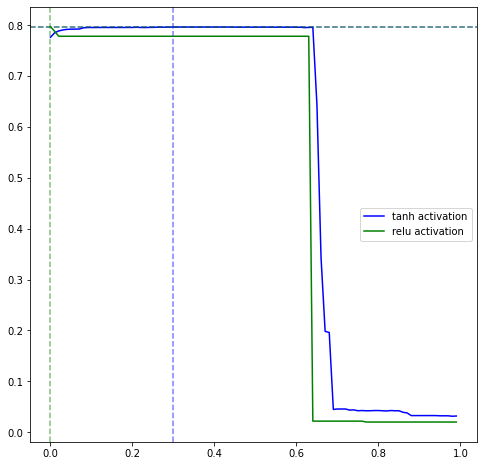

In [40]:
axs_f.plot(thresh_vals, res_relu[:,0], color = 'green', label = 'relu activation')
axs_f.axvline(thresh_vals[max_ind], linestyle = '--', color = 'green', alpha = 0.5)
axs_f.axhline(res_relu[max_ind,0], linestyle = '--', color = 'green', alpha = 0.5)
axs_f.legend()
fig_f

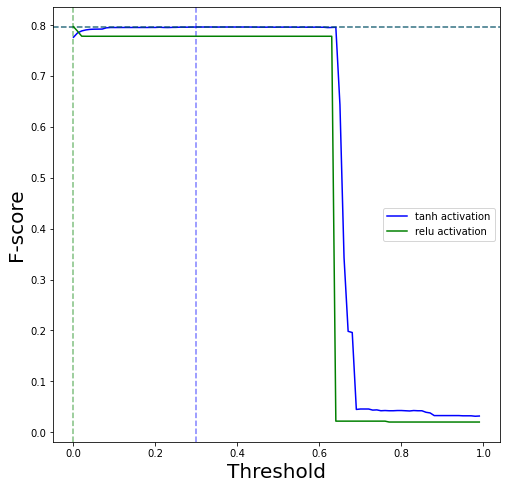

In [41]:
axs_f.set_ylabel('F-score', fontsize = 20)
axs_f.set_xlabel('Threshold', fontsize = 20)
fig_f

In [45]:
avg_tpr_relu = res_relu[:,1:6].mean(axis = 1)
avg_fpr_relu = res_relu[:,6:12].mean(axis = 1)
print(avg_tpr_relu.shape)
print(avg_fpr_relu.shape)

(100,)
(100,)


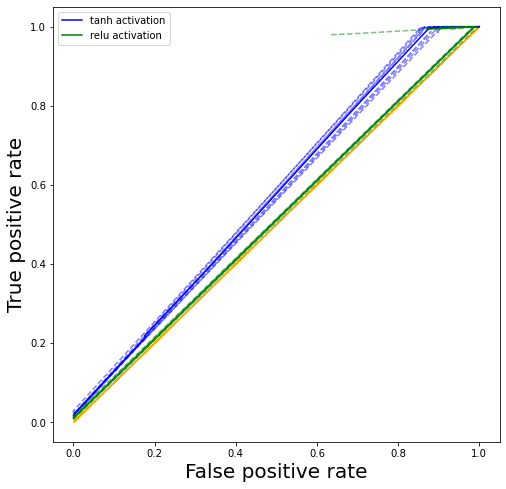

In [46]:
for i in np.arange(5):
    axs_roc.plot(res_relu[:,i+6], res_relu[:,i+1], color = 'green', linestyle = '--', alpha = 0.5)
axs_roc.plot(avg_fpr_relu, avg_tpr_relu, color = 'green', label = 'relu activation')
axs_roc.legend()
fig_roc

# Applying on the validation set

## tanh activation

In [49]:
nn_model = Sequential()
nn_model.add(Dense(128, activation = 'tanh'))
nn_model.add(Dense(32, activation = 'tanh'))
nn_model.add(Dense(1, activation = 'sigmoid'))

nn_model.compile(
    optimizer = 'Adam',
    loss =  BinaryCrossentropy(),
    metrics = ['accuracy']
)

nn_model.fit(X_train, y_train_binary)
tanh_probs = nn_model.predict(X_test)
y_pred_tanh = np.where(tanh_probs>0.5, 1, 0)
print('Accuracy:{}'.format(accuracy_score(y_test_binary, y_pred_tanh)))
print('Precision:{}'.format(precision_score(y_test_binary, y_pred_tanh)))
print('Recall:{}'.format(recall_score(y_test_binary, y_pred_tanh)))
print('F-score:{}'.format(f1_score(y_test_binary, y_pred_tanh)))

25/25 [==============================] - 4s 3ms/step
Accuracy:0.6508344030808729
Precision:0.6468253968253969
Recall:0.9898785425101214
F-score:0.7824000000000001


## ReLU acitvation

In [50]:
nn_model = Sequential()
nn_model.add(Dense(128, activation = 'relu'))
nn_model.add(Dense(32, activation = 'relu'))
nn_model.add(Dense(1, activation = 'sigmoid'))

nn_model.compile(
    optimizer = 'Adam',
    loss =  BinaryCrossentropy(),
    metrics = ['accuracy']
)

nn_model.fit(X_train, y_train_binary)
relu_probs = nn_model.predict(X_test)
y_pred_relu = np.where(relu_probs>0.5, 1, 0)
print('Accuracy:{}'.format(accuracy_score(y_test_binary, y_pred_relu)))
print('Precision:{}'.format(precision_score(y_test_binary, y_pred_relu)))
print('Recall:{}'.format(recall_score(y_test_binary, y_pred_relu)))
print('F-score:{}'.format(f1_score(y_test_binary, y_pred_relu)))

25/25 [==============================] - 3s 2ms/step
Accuracy:0.7252888318356868
Precision:0.7127659574468085
Recall:0.9493927125506073
F-score:0.8142361111111112
